<b>Loading separate data</b>

In [1]:
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')
data_la=pd.read_csv("Crime_Data_from_2010_to_2019.csv")
data_nyc=pd.read_csv("NYPD_Complaint_Data_Historic.csv")

data_la.head()
data_nyc.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,724718389,09/04/2014,17:25:00,09/04/2014,17:35:00,81.0,09/04/2014,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,NaN,NaN,40.685041,-73.921777,"(40.685040958, -73.921776995)",PATROL BORO BKLYN NORTH,NaN,25-44,WHITE,F
1,191133903,10/12/2016,07:40:00,10/12/2016,07:45:00,121.0,10/12/2016,109,GRAND LARCENY,417.0,...,U,NaN,40.636991,-74.134093,"(40.63699139, -74.134092508)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE HISPANIC,F
2,720151206,09/28/2012,13:30:00,09/28/2012,14:00:00,41.0,10/19/2012,109,GRAND LARCENY,413.0,...,M,NaN,40.823876,-73.891863,"(40.823876276, -73.891862968)",PATROL BORO BRONX,NaN,45-64,WHITE HISPANIC,F
3,232242098,03/24/2015,15:45:00,NaN,NaN,46.0,03/24/2015,341,PETIT LARCENY,339.0,...,M,NaN,40.845707,-73.910398,"(40.845707148, -73.910398033)",PATROL BORO BRONX,NaN,<18,WHITE HISPANIC,F
4,708078702,05/20/2017,04:02:00,05/20/2017,04:09:00,109.0,05/20/2017,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,M,NaN,40.763992,-73.828426,"(40.763991557, -73.828425559)",PATROL BORO QUEENS NORTH,NaN,25-44,BLACK,M


<b> Selecting columns to drop</b>

In [2]:
def find_percentage_of_missing_values(df):
    print(df.isnull().sum()/len(df)*100)

In [3]:
find_percentage_of_missing_values(data_la)

DR_NO              0.000000
Date Rptd          0.000000
DATE OCC           0.000000
TIME OCC           0.000000
AREA               0.000000
AREA NAME          0.000000
Rpt Dist No        0.000000
Part 1-2           0.000000
Crm Cd             0.000000
Crm Cd Desc        0.000000
Mocodes           10.780729
Vict Age           0.000000
Vict Sex           9.299539
Vict Descent       9.301761
Premis Cd          0.002506
Premis Desc        0.008842
Weapon Used Cd    66.413608
Weapon Desc       66.413655
Status             0.000142
Status Desc        0.000000
Crm Cd 1           0.000473
Crm Cd 2          93.412665
Crm Cd 3          99.834746
Crm Cd 4          99.995083
LOCATION           0.000000
Cross Street      83.196402
LAT                0.000000
LON                0.000000
dtype: float64


In [4]:
find_percentage_of_missing_values(data_nyc)

CMPLNT_NUM            0.000000
CMPLNT_FR_DT          0.009380
CMPLNT_FR_TM          0.000687
CMPLNT_TO_DT         23.891258
CMPLNT_TO_TM         23.826145
ADDR_PCT_CD           0.031017
RPT_DT                0.000000
KY_CD                 0.000000
OFNS_DESC             0.269575
PD_CD                 0.083987
PD_DESC               0.083987
CRM_ATPT_CPTD_CD      0.000100
LAW_CAT_CD            0.000000
BORO_NM               0.156003
LOC_OF_OCCUR_DESC    21.193586
PREM_TYP_DESC         0.568965
JURIS_DESC            0.000000
JURISDICTION_CODE     0.083987
PARKS_NM             99.641311
HADEVELOPT           95.044855
HOUSING_PSA          92.311427
X_COORD_CD            0.344598
Y_COORD_CD            0.344598
SUSP_AGE_GROUP       67.412766
SUSP_RACE            47.815166
SUSP_SEX             49.724231
TRANSIT_DISTRICT     97.750546
Latitude              0.344598
Longitude             0.344598
Lat_Lon               0.344598
PATROL_BORO           0.090531
STATION_NAME         97.750546
VIC_AGE_

Thus we neglect the columns with high missing values and also the columns that are not common in either of the dataset and rename columns that are same

In [5]:
list(data_nyc)

['CMPLNT_NUM',
 'CMPLNT_FR_DT',
 'CMPLNT_FR_TM',
 'CMPLNT_TO_DT',
 'CMPLNT_TO_TM',
 'ADDR_PCT_CD',
 'RPT_DT',
 'KY_CD',
 'OFNS_DESC',
 'PD_CD',
 'PD_DESC',
 'CRM_ATPT_CPTD_CD',
 'LAW_CAT_CD',
 'BORO_NM',
 'LOC_OF_OCCUR_DESC',
 'PREM_TYP_DESC',
 'JURIS_DESC',
 'JURISDICTION_CODE',
 'PARKS_NM',
 'HADEVELOPT',
 'HOUSING_PSA',
 'X_COORD_CD',
 'Y_COORD_CD',
 'SUSP_AGE_GROUP',
 'SUSP_RACE',
 'SUSP_SEX',
 'TRANSIT_DISTRICT',
 'Latitude',
 'Longitude',
 'Lat_Lon',
 'PATROL_BORO',
 'STATION_NAME',
 'VIC_AGE_GROUP',
 'VIC_RACE',
 'VIC_SEX']

In [6]:
data_la.rename(columns = {'Date Rptd':'DATE_REPORTED','DATE OCC':'DATE_OCCURRED','TIME OCC':'TIME_OCCURRED','AREA ':'PATROL_DIVISION','AREA NAME':'AREA_NAME','Crm Cd':'CRIME_CODE','Crm Cd Desc':'CRIME_DESCRIPTION','Vict Age':'VICTIM_AGE','Vict Sex':'VICTIM_SEX','Vict Descent':'VICTIM_RACE','Premis Desc':'PREMISE'},inplace = True)
data_nyc.rename(columns = {'RPT_DT':'DATE_REPORTED','CMPLNT_FR_DT':'DATE_OCCURRED','CMPLNT_FR_TM':'TIME_OCCURRED','ADDR_PCT_CD':'PATROL_DIVISION','BORO_NM':'AREA_NAME','KY_CD':'CRIME_CODE','OFNS_DESC':'CRIME_DESCRIPTION','VIC_AGE_GROUP':'VICTIM_AGE','VIC_SEX':'VICTIM_SEX','VIC_RACE':'VICTIM_RACE','PREM_TYP_DESC':'PREMISE','Latitude':'LAT','Longitude':'LON'},inplace = True)


In [7]:
data_nyc.head()

,CMPLNT_NUM,DATE_OCCURRED,TIME_OCCURRED,CMPLNT_TO_DT,CMPLNT_TO_TM,PATROL_DIVISION,DATE_REPORTED,CRIME_CODE,CRIME_DESCRIPTION,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,LAT,LON,Lat_Lon,PATROL_BORO,STATION_NAME,VICTIM_AGE,VICTIM_RACE,VICTIM_SEX
0,724718389,09/04/2014,17:25:00,09/04/2014,17:35:00,81.0,09/04/2014,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,NaN,NaN,40.685041,-73.921777,"(40.685040958, -73.921776995)",PATROL BORO BKLYN NORTH,NaN,25-44,WHITE,F
1,191133903,10/12/2016,07:40:00,10/12/2016,07:45:00,121.0,10/12/2016,109,GRAND LARCENY,417.0,...,U,NaN,40.636991,-74.134093,"(40.63699139, -74.134092508)",PATROL BORO STATEN ISLAND,NaN,45-64,WHITE HISPANIC,F
2,720151206,09/28/2012,13:30:00,09/28/2012,14:00:00,41.0,10/19/2012,109,GRAND LARCENY,413.0,...,M,NaN,40.823876,-73.891863,"(40.823876276, -73.891862968)",PATROL BORO BRONX,NaN,45-64,WHITE HISPANIC,F
3,232242098,03/24/2015,15:45:00,NaN,NaN,46.0,03/24/2015,341,PETIT LARCENY,339.0,...,M,NaN,40.845707,-73.910398,"(40.845707148, -73.910398033)",PATROL BORO BRONX,NaN,<18,WHITE HISPANIC,F
4,708078702,05/20/2017,04:02:00,05/20/2017,04:09:00,109.0,05/20/2017,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,M,NaN,40.763992,-73.828426,"(40.763991557, -73.828425559)",PATROL BORO QUEENS NORTH,NaN,25-44,BLACK,M


In [8]:
data_la.head()

,DR_NO,DATE_REPORTED,DATE_OCCURRED,TIME_OCCURRED,PATROL_DIVISION,AREA_NAME,Rpt Dist No,Part 1-2,CRIME_CODE,CRIME_DESCRIPTION,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


Changing date format in both datasets for columns "DATE_REPORTED" and "DATE_OCCURRED" to match a standard time format

In [9]:
def change_date_format(val):
    if len(val)>10:
        split_val=val[:10].split('/')
    else:
        split_val=val.split('/')
    return split_val[2]+"-"+split_val[0]+"-"+split_val[1]


<b>Appending target column to each dataframe which determines whether it is la or nyc & Selecting common attributes and merging them</b>

In [10]:
data_la["TARGET"]="LA"
data_nyc["TARGET"]="NYC"
attributes_to_select=["DATE_REPORTED","DATE_OCCURRED","TIME_OCCURRED","PATROL_DIVISION","AREA_NAME","CRIME_CODE","CRIME_DESCRIPTION","VICTIM_AGE","VICTIM_SEX","VICTIM_RACE","PREMISE","LAT","LON","TARGET"]
data_la=data_la[attributes_to_select]
data_nyc=data_nyc[attributes_to_select]


data_nyc = data_nyc.dropna(how='any',axis=0) 
data_la = data_la.dropna(how='any',axis=0) 
data_nyc=data_nyc.reset_index()
data_la=data_la.reset_index()

f = lambda x: change_date_format(x)
data_nyc["DATE_REPORTED"] = data_nyc["DATE_REPORTED"].apply(f)
data_nyc["DATE_OCCURRED"] = data_nyc["DATE_OCCURRED"].apply(f)

data_la["DATE_REPORTED"] = data_la["DATE_REPORTED"].apply(f)
data_la["DATE_OCCURRED"] = data_la["DATE_OCCURRED"].apply(f)


data_nyc.head()




,index,DATE_REPORTED,DATE_OCCURRED,TIME_OCCURRED,PATROL_DIVISION,AREA_NAME,CRIME_CODE,CRIME_DESCRIPTION,VICTIM_AGE,VICTIM_SEX,VICTIM_RACE,PREMISE,LAT,LON,TARGET
0,0,2014-09-04,2014-09-04,17:25:00,81.0,BROOKLYN,344,ASSAULT 3 & RELATED OFFENSES,25-44,F,WHITE,STREET,40.685041,-73.921777,NYC
1,1,2016-10-12,2016-10-12,07:40:00,121.0,STATEN ISLAND,109,GRAND LARCENY,45-64,F,WHITE HISPANIC,STREET,40.636991,-74.134093,NYC
2,2,2012-10-19,2012-09-28,13:30:00,41.0,BRONX,109,GRAND LARCENY,45-64,F,WHITE HISPANIC,STREET,40.823876,-73.891863,NYC
3,3,2015-03-24,2015-03-24,15:45:00,46.0,BRONX,341,PETIT LARCENY,<18,F,WHITE HISPANIC,STREET,40.845707,-73.910398,NYC
4,4,2017-05-20,2017-05-20,04:02:00,109.0,QUEENS,344,ASSAULT 3 & RELATED OFFENSES,25-44,M,BLACK,STREET,40.763992,-73.828426,NYC


In [11]:
data_la


,index,DATE_REPORTED,DATE_OCCURRED,TIME_OCCURRED,PATROL_DIVISION,AREA_NAME,CRIME_CODE,CRIME_DESCRIPTION,VICTIM_AGE,VICTIM_SEX,VICTIM_RACE,PREMISE,LAT,LON,TARGET
0,0,2010-02-20,2010-02-20,1350,13,Newton,900,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,33.9825,-118.2695,LA
1,1,2010-09-13,2010-09-12,45,14,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,STREET,33.9599,-118.3962,LA
2,2,2010-08-09,2010-08-09,1515,13,Newton,946,OTHER MISCELLANEOUS CRIME,0,M,H,ALLEY,34.0224,-118.2524,LA
3,3,2010-01-05,2010-01-05,150,6,Hollywood,900,VIOLATION OF COURT ORDER,47,F,W,STREET,34.1016,-118.3295,LA
4,4,2010-01-03,2010-01-02,2100,1,Central,122,"RAPE, ATTEMPTED",47,F,H,ALLEY,34.0387,-118.2488,LA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918028,2114916,2019-02-22,2019-02-22,840,5,Harbor,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,14,F,W,PARK/PLAYGROUND,33.7257,-118.2801,LA
1918029,2114917,2019-03-28,2019-03-28,400,6,Hollywood,648,ARSON,0,X,X,SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S...,34.0962,-118.3490,LA
1918030,2114918,2019-08-15,2019-08-14,1810,7,Wilshire,331,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),40,M,W,STREET,34.0871,-118.3732,LA
1918031,2114919,2019-01-06,2019-01-06,2100,20,Olympic,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,46,F,B,SIDEWALK,34.0637,-118.2870,LA


<b>Loading data in csv</b>

In [12]:
data=pd.concat([data_la, data_nyc], ignore_index=True)
data.head()

,index,DATE_REPORTED,DATE_OCCURRED,TIME_OCCURRED,PATROL_DIVISION,AREA_NAME,CRIME_CODE,CRIME_DESCRIPTION,VICTIM_AGE,VICTIM_SEX,VICTIM_RACE,PREMISE,LAT,LON,TARGET
0,0,2010-02-20,2010-02-20,1350,13.0,Newton,900,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,33.9825,-118.2695,LA
1,1,2010-09-13,2010-09-12,45,14.0,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,STREET,33.9599,-118.3962,LA
2,2,2010-08-09,2010-08-09,1515,13.0,Newton,946,OTHER MISCELLANEOUS CRIME,0,M,H,ALLEY,34.0224,-118.2524,LA
3,3,2010-01-05,2010-01-05,150,6.0,Hollywood,900,VIOLATION OF COURT ORDER,47,F,W,STREET,34.1016,-118.3295,LA
4,4,2010-01-03,2010-01-02,2100,1.0,Central,122,"RAPE, ATTEMPTED",47,F,H,ALLEY,34.0387,-118.2488,LA


In [28]:
data = pd.read_csv("raw_data.csv")
data = data.dropna(how='any',axis=0) 

<b> Drop column </b>

H                                 17097
W                                 12100
BLACK                             11544
WHITE                              8417
B                                  7951
WHITE HISPANIC                     7851
UNKNOWN                            5474
O                                  4827
ASIAN / PACIFIC ISLANDER           2734
X                                  1776
BLACK HISPANIC                     1646
A                                  1245
AMERICAN INDIAN/ALASKAN NATIVE      217
K                                   205
F                                    64
C                                    25
I                                    23
P                                    14
J                                    11
U                                    10
V                                     6
Z                                     2
D                                     1
Name: VICTIM_RACE, dtype: int64


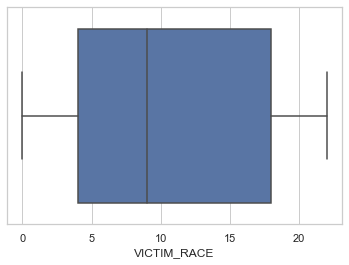

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
col="VICTIM_RACE"
print(data["VICTIM_RACE"].value_counts())
le.fit(data[col])
data[col]=le.transform(data[col])
classes=le.classes_
transformed_class=le.transform(le.classes_)
sns.boxplot(x=data[col])

In [13]:
data.drop(data.columns[0], axis=1, inplace=True)

In [14]:
data

,DATE_REPORTED,DATE_OCCURRED,TIME_OCCURRED,PATROL_DIVISION,AREA_NAME,CRIME_CODE,CRIME_DESCRIPTION,VICTIM_AGE,VICTIM_SEX,VICTIM_RACE,PREMISE,LAT,LON,TARGET
0,2010-02-20,2010-02-20,1350,13.0,Newton,900,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,33.982500,-118.269500,LA
1,2010-09-13,2010-09-12,45,14.0,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,STREET,33.959900,-118.396200,LA
2,2010-08-09,2010-08-09,1515,13.0,Newton,946,OTHER MISCELLANEOUS CRIME,0,M,H,ALLEY,34.022400,-118.252400,LA
3,2010-01-05,2010-01-05,150,6.0,Hollywood,900,VIOLATION OF COURT ORDER,47,F,W,STREET,34.101600,-118.329500,LA
4,2010-01-03,2010-01-02,2100,1.0,Central,122,"RAPE, ATTEMPTED",47,F,H,ALLEY,34.038700,-118.248800,LA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207019,2014-03-04,2014-03-02,20:30:00,41.0,BRONX,105,ROBBERY,45-64,M,BLACK,STREET,40.816392,-73.895296,NYC
7207020,2013-12-04,2013-03-13,12:00:00,61.0,BROOKLYN,109,GRAND LARCENY,25-44,F,WHITE,RESIDENCE - APT. HOUSE,40.583360,-73.951446,NYC
7207021,2012-12-20,2012-12-20,13:30:00,70.0,BROOKLYN,344,ASSAULT 3 & RELATED OFFENSES,25-44,F,BLACK,STREET,40.648648,-73.967731,NYC
7207022,2013-04-04,2013-04-04,13:00:00,90.0,BROOKLYN,341,PETIT LARCENY,45-64,M,WHITE,STREET,40.716045,-73.964163,NYC


<b>Cleaning attributes</b>


<b>TIME_OCCURRED</b>: is in a "hh:mm:ss" format for the new york dataset whereas military time format for LA dataset.
Converting the time to hh:mm:yy format all rows

In [15]:
def split_time(time):
    if type(time)==type(""):
        return "".join(time.split(":")[:-1])
    else:
        return time
f = lambda x: split_time(x)
data.loc[data["TARGET"] == "NYC", 'TIME_OCCURRED'] = data["TIME_OCCURRED"].apply(f)
data
# for index,val in enumerate(data["TIME_OCCURRED"]):
#     if data["TARGET"]=="NYC":
#         data["TIME_OCCURRED"][index]=re.sub('^(?:(?:([01]?\d|2[0-3]):)?([0-5]?\d):)?([0-5]?\d)$', "".join(val.split(":")[:-1]), val)

,DATE_REPORTED,DATE_OCCURRED,TIME_OCCURRED,PATROL_DIVISION,AREA_NAME,CRIME_CODE,CRIME_DESCRIPTION,VICTIM_AGE,VICTIM_SEX,VICTIM_RACE,PREMISE,LAT,LON,TARGET
0,2010-02-20,2010-02-20,1350,13.0,Newton,900,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,33.982500,-118.269500,LA
1,2010-09-13,2010-09-12,45,14.0,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,W,STREET,33.959900,-118.396200,LA
2,2010-08-09,2010-08-09,1515,13.0,Newton,946,OTHER MISCELLANEOUS CRIME,0,M,H,ALLEY,34.022400,-118.252400,LA
3,2010-01-05,2010-01-05,150,6.0,Hollywood,900,VIOLATION OF COURT ORDER,47,F,W,STREET,34.101600,-118.329500,LA
4,2010-01-03,2010-01-02,2100,1.0,Central,122,"RAPE, ATTEMPTED",47,F,H,ALLEY,34.038700,-118.248800,LA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207019,2014-03-04,2014-03-02,2030,41.0,BRONX,105,ROBBERY,45-64,M,BLACK,STREET,40.816392,-73.895296,NYC
7207020,2013-12-04,2013-03-13,1200,61.0,BROOKLYN,109,GRAND LARCENY,25-44,F,WHITE,RESIDENCE - APT. HOUSE,40.583360,-73.951446,NYC
7207021,2012-12-20,2012-12-20,1330,70.0,BROOKLYN,344,ASSAULT 3 & RELATED OFFENSES,25-44,F,BLACK,STREET,40.648648,-73.967731,NYC
7207022,2013-04-04,2013-04-04,1300,90.0,BROOKLYN,341,PETIT LARCENY,45-64,M,WHITE,STREET,40.716045,-73.964163,NYC


Removing rows where value is blank

In [16]:
data=data[data["TIME_OCCURRED"]!='']
data=data.reset_index()

In [17]:
def convert_to_hh_mm_ss(val):
    if len(val)==1:
        return "00:0"+val+":00"
    elif len(val)==2:
        return "00:"+val+":00"
    elif len(val)==3:
        return "0"+val[0]+":"+val[1:]+":00"
    else:
        return val[0:2]+":"+val[2:]+":00"

f = lambda x: convert_to_hh_mm_ss(str(x))

data["TIME_OCCURRED"] = data["TIME_OCCURRED"].apply(f)

In [18]:
data["TIME_OCCURRED"]

0          13:50:00
1          00:45:00
2          15:15:00
3          01:50:00
4          21:00:00
             ...   
7207019    20:30:00
7207020    12:00:00
7207021    13:30:00
7207022    13:00:00
7207023    01:00:00
Name: TIME_OCCURRED, Length: 7207024, dtype: object

<b>PATROL DIVISION</b>: These numbers belong to the respective precincts, they are float values, would be converted to integers
Same is the case for <b>CRIME_CODE</b>


In [19]:
data['PATROL_DIVISION'] = data['PATROL_DIVISION'].astype('Int64')
data['CRIME_CODE'] = data['CRIME_CODE'].astype('Int64')

In [35]:
data.head()


,index,DATE_REPORTED,DATE_OCCURRED,TIME_OCCURRED,PATROL_DIVISION,AREA_NAME,CRIME_CODE,CRIME_DESCRIPTION,VICTIM_AGE,VICTIM_SEX,VICTIM_RACE,PREMISE,LAT,LON,TARGET
0,0,2010-02-20,2010-02-20,13:50:00,13,Newton,900,VIOLATION OF COURT ORDER,45-65,M,Hispanic/Latin/Mexican,SINGLE FAMILY DWELLING,33.9825,-118.2695,LA
1,1,2010-09-13,2010-09-12,00:45:00,14,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",25-44,M,White,STREET,33.9599,-118.3962,LA
2,2,2010-08-09,2010-08-09,15:15:00,13,Newton,946,OTHER MISCELLANEOUS CRIME,25-44,M,Hispanic/Latin/Mexican,ALLEY,34.0224,-118.2524,LA
3,3,2010-01-05,2010-01-05,01:50:00,6,Hollywood,900,VIOLATION OF COURT ORDER,45-65,F,White,STREET,34.1016,-118.3295,LA
4,4,2010-01-03,2010-01-02,21:00:00,1,Central,122,"RAPE, ATTEMPTED",45-65,F,Hispanic/Latin/Mexican,ALLEY,34.0387,-118.2488,LA


<b>VICTIM_AGE</b> was converted to range values, as NY database consisted of range and LA database consisted to absolute values , replacing the unknown values of this column with the mode

In [21]:
from collections import defaultdict
import operator

def range_from_age(age):
    if age==0 or age is None:
        return "UNKNOWN"
    if age<18:
        return "<18"
    if age > 18 and age <=24:
        return "18-24"
    if age >24 and age <=44:
        return "25-44"
    if age >44 and age <=65:
        return "45-65"
    else:
        return "65+"


def get_age(val):
    if type(val)==str:
        if str.isdigit(val):
            return range_from_age(int(val))
        else:
            return "UNKNOWN"
    else:
        return "UNKNOWN"
    
f = lambda x: get_age(str(x))

data["VICTIM_AGE"] = data["VICTIM_AGE"].apply(f)
    
data    


,index,DATE_REPORTED,DATE_OCCURRED,TIME_OCCURRED,PATROL_DIVISION,AREA_NAME,CRIME_CODE,CRIME_DESCRIPTION,VICTIM_AGE,VICTIM_SEX,VICTIM_RACE,PREMISE,LAT,LON,TARGET
0,0,2010-02-20,2010-02-20,13:50:00,13,Newton,900,VIOLATION OF COURT ORDER,45-65,M,H,SINGLE FAMILY DWELLING,33.982500,-118.269500,LA
1,1,2010-09-13,2010-09-12,00:45:00,14,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",UNKNOWN,M,W,STREET,33.959900,-118.396200,LA
2,2,2010-08-09,2010-08-09,15:15:00,13,Newton,946,OTHER MISCELLANEOUS CRIME,UNKNOWN,M,H,ALLEY,34.022400,-118.252400,LA
3,3,2010-01-05,2010-01-05,01:50:00,6,Hollywood,900,VIOLATION OF COURT ORDER,45-65,F,W,STREET,34.101600,-118.329500,LA
4,4,2010-01-03,2010-01-02,21:00:00,1,Central,122,"RAPE, ATTEMPTED",45-65,F,H,ALLEY,34.038700,-118.248800,LA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207019,7207019,2014-03-04,2014-03-02,20:30:00,41,BRONX,105,ROBBERY,UNKNOWN,M,BLACK,STREET,40.816392,-73.895296,NYC
7207020,7207020,2013-12-04,2013-03-13,12:00:00,61,BROOKLYN,109,GRAND LARCENY,UNKNOWN,F,WHITE,RESIDENCE - APT. HOUSE,40.583360,-73.951446,NYC
7207021,7207021,2012-12-20,2012-12-20,13:30:00,70,BROOKLYN,344,ASSAULT 3 & RELATED OFFENSES,UNKNOWN,F,BLACK,STREET,40.648648,-73.967731,NYC
7207022,7207022,2013-04-04,2013-04-04,13:00:00,90,BROOKLYN,341,PETIT LARCENY,UNKNOWN,M,WHITE,STREET,40.716045,-73.964163,NYC


In [45]:
data

,index,DATE_REPORTED,DATE_OCCURRED,TIME_OCCURRED,PATROL_DIVISION,AREA_NAME,CRIME_CODE,CRIME_DESCRIPTION,VICTIM_AGE,VICTIM_SEX,VICTIM_RACE,PREMISE,LAT,LON,TARGET
0,0,2010-02-20,2010-02-20,13:50:00,13,Newton,900,VIOLATION OF COURT ORDER,45-65,M,Hispanic/Latin/Mexican,SINGLE FAMILY DWELLING,33.982500,-118.269500,LA
1,1,2010-09-13,2010-09-12,00:45:00,14,Pacific,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",25-44,M,White,STREET,33.959900,-118.396200,LA
2,2,2010-08-09,2010-08-09,15:15:00,13,Newton,946,OTHER MISCELLANEOUS CRIME,25-44,M,Hispanic/Latin/Mexican,ALLEY,34.022400,-118.252400,LA
3,3,2010-01-05,2010-01-05,01:50:00,6,Hollywood,900,VIOLATION OF COURT ORDER,45-65,F,White,STREET,34.101600,-118.329500,LA
4,4,2010-01-03,2010-01-02,21:00:00,1,Central,122,"RAPE, ATTEMPTED",45-65,F,Hispanic/Latin/Mexican,ALLEY,34.038700,-118.248800,LA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207019,7207019,2014-03-04,2014-03-02,20:30:00,41,BRONX,105,ROBBERY,25-44,M,Black,STREET,40.816392,-73.895296,NYC
7207020,7207020,2013-12-04,2013-03-13,12:00:00,61,BROOKLYN,109,GRAND LARCENY,25-44,F,White,RESIDENCE - APT. HOUSE,40.583360,-73.951446,NYC
7207021,7207021,2012-12-20,2012-12-20,13:30:00,70,BROOKLYN,344,ASSAULT 3 & RELATED OFFENSES,25-44,F,Black,STREET,40.648648,-73.967731,NYC
7207022,7207022,2013-04-04,2013-04-04,13:00:00,90,BROOKLYN,341,PETIT LARCENY,25-44,M,White,STREET,40.716045,-73.964163,NYC


In [22]:
def increment_dict(x,dictionary):
    dictionary[x]+=1
    return x

def replace_unknown_with_mode(column_name,unknown_value_name,replace_by_str=None):
    d=defaultdict(int)
    f = lambda x: increment_dict(x,d)
    
    data[column_name]=data[column_name].apply(f)
    
    d[unknown_value_name]=0
    if replace_by_str:
        mode_val=replace_by_str
    else:
        mode_val= max(d.items(), key=operator.itemgetter(1))[0]
    data[column_name]=data[column_name].replace([unknown_value_name],mode_val)

replace_unknown_with_mode("VICTIM_AGE","UNKNOWN")

<b>VICTIM_SEX</b> has a defaut value for unknown which is "D" , the current default value is "E" for unknown

In [23]:
def check_for_unknown(val):
    if val =="D":
        return "E"
    else:
        return val
    
f = lambda x: check_for_unknown(x)
data["VICTIM_SEX"]=data["VICTIM_SEX"].apply(f)

    
data["VICTIM_SEX"]

0          M
1          M
2          M
3          F
4          F
          ..
7207019    M
7207020    F
7207021    F
7207022    M
7207023    F
Name: VICTIM_SEX, Length: 7207024, dtype: object

In [24]:
replace_unknown_with_mode("VICTIM_SEX","E")
replace_unknown_with_mode("VICTIM_SEX","-")
replace_unknown_with_mode("VICTIM_SEX","X")
replace_unknown_with_mode("VICTIM_SEX","H")
replace_unknown_with_mode("VICTIM_SEX","N")

In [25]:
data["VICTIM_SEX"].value_counts()

F    4071368
M    3135656
Name: VICTIM_SEX, dtype: int64

<b>VICTIM_RACE</b> is menioned in words for NY dataset whereas LA dataset provides a character to word mapping, hence exapnding the map to get appropriate race

In [26]:
def map_to_race(string,char_to_descent_map):
    if len(string.lstrip().rstrip())==1:
        if string in char_to_descent_map.keys():
            return char_to_descent_map[string]
        else:
            return char_to_descent_map["X"]
    else:
        if string=="American indian/alaskan native":
            return "American Indian/Alaskan Native"
        return string.capitalize()
    
char_to_descent_map={"A":"Other Asian", "B": "Black", "C" : "Chinese", "D" : "Cambodian", "F": "Filipino","G" :"Guamanian" ,"H":"Hispanic/Latin/Mexican" ,"I": "American Indian/Alaskan Native" ,"J": "Japanese", "K":"Korean", "L" :"Laotian" ,"O" : "Other", "P": "Pacific Islander", "S": "Samoan", "U": "Hawaiian","V": "Vietnamese", "W" : "White" ,"X": "Unknown" ,"Z" :"Asian Indian"}

f = lambda x: map_to_race(x,char_to_descent_map)

data["VICTIM_RACE"]=data["VICTIM_RACE"].apply(f)
    

In [27]:
replace_unknown_with_mode("VICTIM_RACE","Unknown","Other")

In [28]:
data["VICTIM_RACE"].value_counts()

Black                             1954467
White                             1678259
White hispanic                    1092123
Other                             1045960
Hispanic/Latin/Mexican             725403
Asian / pacific islander           384902
Black hispanic                     228357
Other Asian                         51112
American indian/alaskan native      31292
Korean                               9143
Filipino                             2554
Chinese                              1062
American Indian/Alaskan Native        945
Japanese                              418
Pacific Islander                      343
Vietnamese                            201
Hawaiian                              190
Asian Indian                          136
Guamanian                              85
Samoan                                 31
Cambodian                              23
Laotian                                18
Name: VICTIM_RACE, dtype: int64

<b> Drop missing values </b>

In [29]:

data = data.dropna(how='any',axis=0) 
data["TARGET"].value_counts()

NYC    5288991
LA     1918033
Name: TARGET, dtype: int64

In [30]:
[n_max,n_min]=data["TARGET"].value_counts()

# Sample the data with n value and shuffle all rows and return
def sample_data(n):
    df1 = data[data['TARGET']=="NYC"].sample(n=n)
    df0 = data[data['TARGET']=="LA"].sample(n=n,replace=True)
    return pd.concat([df1,df0]).sample(frac=1)

<b> Oversampling the data <b>

In [31]:
data_oversampled=sample_data(n_max)
data_oversampled=data_oversampled.reset_index()
del data_oversampled["index"]
del data_oversampled["level_0"]
data_oversampled["TARGET"].value_counts()


LA     5288991
NYC    5288991
Name: TARGET, dtype: int64

In [32]:
data_oversampled.columns

Index(['DATE_REPORTED', 'DATE_OCCURRED', 'TIME_OCCURRED', 'PATROL_DIVISION',
       'AREA_NAME', 'CRIME_CODE', 'CRIME_DESCRIPTION', 'VICTIM_AGE',
       'VICTIM_SEX', 'VICTIM_RACE', 'PREMISE', 'LAT', 'LON', 'TARGET'],
      dtype='object')

<b> Undersampling the data <b>

In [33]:
data_undersampled=sample_data(n_min)
data_undersampled=data_undersampled.reset_index()
del data_undersampled["index"]
data_undersampled["TARGET"].value_counts()
del data_undersampled["level_0"]
data_undersampled

,DATE_REPORTED,DATE_OCCURRED,TIME_OCCURRED,PATROL_DIVISION,AREA_NAME,CRIME_CODE,CRIME_DESCRIPTION,VICTIM_AGE,VICTIM_SEX,VICTIM_RACE,PREMISE,LAT,LON,TARGET
0,2010-10-25,2010-10-22,01:30:00,78,BROOKLYN,341,PETIT LARCENY,25-44,M,White,RESIDENCE-HOUSE,40.671155,-73.976379,NYC
1,2007-09-26,2007-09-26,11:15:00,115,QUEENS,344,ASSAULT 3 & RELATED OFFENSES,25-44,M,Other,RESIDENCE - APT. HOUSE,40.758270,-73.887753,NYC
2,2017-06-17,2017-06-17,20:00:00,20,MANHATTAN,105,ROBBERY,25-44,M,White hispanic,GROCERY/BODEGA,40.788037,-73.976882,NYC
3,2013-02-28,2013-02-28,12:45:00,109,QUEENS,344,ASSAULT 3 & RELATED OFFENSES,25-44,F,Black,PUBLIC SCHOOL,40.765235,-73.828462,NYC
4,2017-04-04,2017-04-04,13:45:00,104,QUEENS,232,POSSESSION OF STOLEN PROPERTY,25-44,F,Other,JEWELRY,40.705527,-73.896455,NYC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3836061,2018-08-21,2018-08-21,06:05:00,106,QUEENS,126,MISCELLANEOUS PENAL LAW,25-44,F,White hispanic,RESIDENCE-HOUSE,40.665067,-73.815812,NYC
3836062,2011-05-25,2011-05-20,20:30:00,9,Van Nuys,440,THEFT PLAIN - PETTY ($950 & UNDER),45-65,M,Black,STREET,34.185700,-118.448700,LA
3836063,2014-02-24,2014-02-06,03:00:00,8,West LA,440,THEFT PLAIN - PETTY ($950 & UNDER),45-65,M,White,ALLEY,34.055300,-118.393200,LA
3836064,2014-01-28,2014-01-28,01:45:00,52,BRONX,344,ASSAULT 3 & RELATED OFFENSES,25-44,F,White hispanic,HOTEL/MOTEL,40.870490,-73.878000,NYC


<b>Data with 100k rows<b>

<b>Saving the data to a file</b>

In [268]:
data_oversampled.to_csv("cleaned_data_oversampled.csv")
data_undersampled.to_csv("cleaned_data_undersampled.csv")
data_100k.to_csv("cleaned_data_100k.csv")

<b>Boxplot of categorical and numerical values<b>

In [38]:
df_to_work=data.drop(['index','TARGET',"DATE_REPORTED",'DATE_OCCURRED','TIME_OCCURRED','CRIME_DESCRIPTION','PREMISE'],axis=1)

In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [40]:
df_to_work

,PATROL_DIVISION,AREA_NAME,CRIME_CODE,VICTIM_AGE,VICTIM_SEX,VICTIM_RACE,LAT,LON
0,13,Newton,900,45-65,M,Hispanic/Latin/Mexican,33.982500,-118.269500
1,14,Pacific,740,25-44,M,White,33.959900,-118.396200
2,13,Newton,946,25-44,M,Hispanic/Latin/Mexican,34.022400,-118.252400
3,6,Hollywood,900,45-65,F,White,34.101600,-118.329500
4,1,Central,122,45-65,F,Hispanic/Latin/Mexican,34.038700,-118.248800
...,...,...,...,...,...,...,...,...
7207019,41,BRONX,105,25-44,M,Black,40.816392,-73.895296
7207020,61,BROOKLYN,109,25-44,F,White,40.583360,-73.951446
7207021,70,BROOKLYN,344,25-44,F,Black,40.648648,-73.967731
7207022,90,BROOKLYN,341,25-44,M,White,40.716045,-73.964163


In [41]:
df_to_work["VICTIM_AGE"].value_counts()

25-44    6256561
45-65     484308
18-24     234638
65+       128533
<18       102984
Name: VICTIM_AGE, dtype: int64

In [44]:
import seaborn as sns
sns.set(style="whitegrid")
col="PATROL_DIVISION"
sns.boxplot(x=df_to_work[df_to_work['PATROL_DIVISION'])

TypeError: 'bool' object does not support item assignment

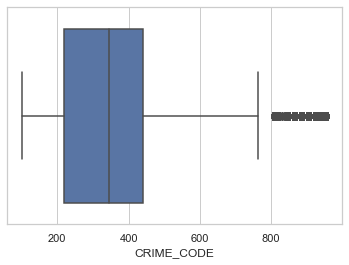

In [273]:
# sns.boxplot(x=df_to_work['CRIME_CODE'])
col="CRIME_CODE"
sns.boxplot(x=df_to_work[col])

0  -> represents ->  77th Street
1  -> represents ->  BRONX
2  -> represents ->  BROOKLYN
3  -> represents ->  Central
4  -> represents ->  Devonshire
5  -> represents ->  Foothill
6  -> represents ->  Harbor
7  -> represents ->  Hollenbeck
8  -> represents ->  Hollywood
9  -> represents ->  MANHATTAN
10  -> represents ->  Mission
11  -> represents ->  N Hollywood
12  -> represents ->  Newton
13  -> represents ->  Northeast
14  -> represents ->  Olympic
15  -> represents ->  Pacific
16  -> represents ->  QUEENS
17  -> represents ->  Rampart
18  -> represents ->  STATEN ISLAND
19  -> represents ->  Southeast
20  -> represents ->  Southwest
21  -> represents ->  Topanga
22  -> represents ->  Van Nuys
23  -> represents ->  West LA
24  -> represents ->  West Valley
25  -> represents ->  Wilshire


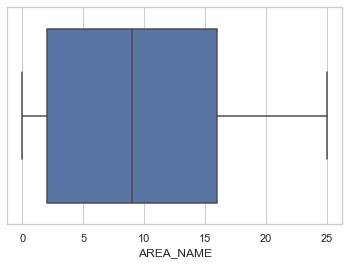

In [274]:
col="AREA_NAME"
le.fit(df_to_work[col])
df_to_work[col]=le.transform(df_to_work[col])
classes=le.classes_
transformed_class=le.transform(le.classes_)
for i in range(len(classes)):
    print(transformed_class[i]," -> represents -> ",classes[i])
sns.boxplot(x=df_to_work[col])

0  -> represents ->  18-24
1  -> represents ->  25-44
2  -> represents ->  45-65
3  -> represents ->  65+
4  -> represents ->  <18


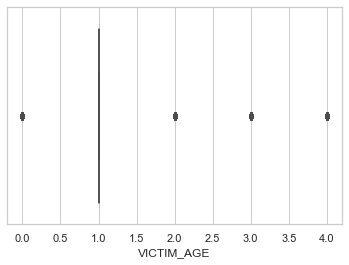

In [275]:
col="VICTIM_AGE"
le.fit(df_to_work[col])
df_to_work[col]=le.transform(df_to_work[col])
classes=le.classes_
transformed_class=le.transform(le.classes_)
for i in range(len(classes)):
    print(transformed_class[i]," -> represents -> ",classes[i])
sns.boxplot(x=df_to_work[col])

0  -> represents ->  F
1  -> represents ->  M


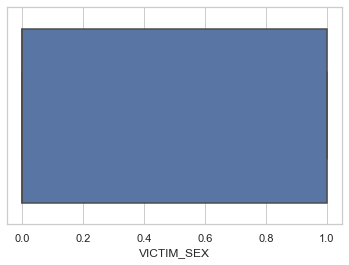

In [276]:
# sns.boxplot(x=df_to_work['CRIME_CODE'])
col="VICTIM_SEX"
le.fit(df_to_work[col])
df_to_work[col]=le.transform(df_to_work[col])
classes=le.classes_
transformed_class=le.transform(le.classes_)
for i in range(len(classes)):
    print(transformed_class[i]," -> represents -> ",classes[i])
sns.boxplot(x=df_to_work[col])

0  -> represents ->  American Indian/Alaskan Native
1  -> represents ->  American indian/alaskan native
2  -> represents ->  Asian / pacific islander
3  -> represents ->  Asian Indian
4  -> represents ->  Black
5  -> represents ->  Black hispanic
6  -> represents ->  Cambodian
7  -> represents ->  Chinese
8  -> represents ->  Filipino
9  -> represents ->  Guamanian
10  -> represents ->  Hawaiian
11  -> represents ->  Hispanic/Latin/Mexican
12  -> represents ->  Japanese
13  -> represents ->  Korean
14  -> represents ->  Laotian
15  -> represents ->  Other
16  -> represents ->  Other Asian
17  -> represents ->  Pacific Islander
18  -> represents ->  Samoan
19  -> represents ->  Vietnamese
20  -> represents ->  White
21  -> represents ->  White hispanic


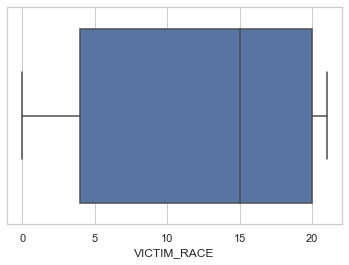

In [277]:
# sns.boxplot(x=df_to_work['CRIME_CODE'])
col="VICTIM_RACE"
le.fit(df_to_work[col])
df_to_work[col]=le.transform(df_to_work[col])
classes=le.classes_
transformed_class=le.transform(le.classes_)
for i in range(len(classes)):
    print(transformed_class[i]," -> represents -> ",classes[i])
sns.boxplot(x=df_to_work[col])